# Titanic Dataset Logistic Regression

In [3]:
 # Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics


## EDA

In [4]:
titanic_train = pd.read_csv("/content/drive/MyDrive/ML Datasets/Classification/titanic_train.csv")

In [5]:
titanic_train.shape

(891, 12)

In [6]:
titanic_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
titanic_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
titanic_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Handling Null Values

In [9]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
titanic_train = titanic_train.drop(['PassengerId','Name','Cabin','Ticket'], axis = 1)

In [11]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
titanic_train.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [16]:
def age_approx(cols):
  age = cols[0]
  p_class = cols[1]
  if pd.isnull(age):
    if p_class == 1:
      return 37
    elif p_class == 2:
      return 29
    else :
      return 24
  return age


In [17]:
titanic_train['Age'] = titanic_train[['Age','Pclass']].apply(age_approx,axis = 1)

In [18]:
titanic_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [19]:
titanic_train.dropna(inplace = True)
titanic_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Feature Engineering

In [20]:
titanic_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [21]:
titanic_train_dummied = pd.get_dummies(titanic_train, columns = ["Embarked","Sex"])

In [22]:
titanic_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1


<Axes: >

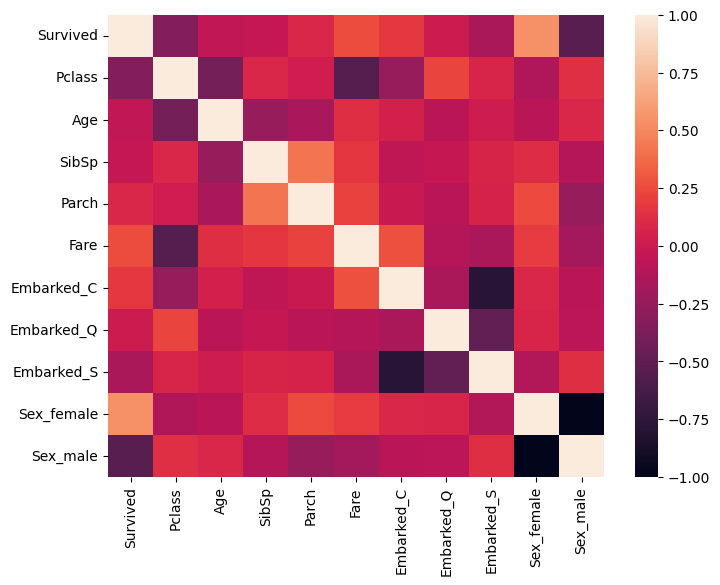

In [24]:
plt.figure(figsize = (8,6))
sns.heatmap(titanic_train_dummied.corr())

In [45]:
X = titanic_train_dummied.drop(['Survived'], axis = 1)
y = titanic_train_dummied['Survived']

## Model Building And Review

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(666, 10)
(223, 10)
(666,)
(223,)


In [48]:
logreg = LogisticRegression(max_iter = 1000)

In [49]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [50]:
yhat = logreg.predict(X_test)

In [51]:
confusion_matrix(y_test,yhat)

array([[125,  12],
       [ 19,  67]])

In [52]:
accuracy_score(y_test,yhat)

0.8609865470852018

In [53]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       137
           1       0.85      0.78      0.81        86

    accuracy                           0.86       223
   macro avg       0.86      0.85      0.85       223
weighted avg       0.86      0.86      0.86       223



In [54]:
logreg.coef_

array([[-1.17827659e+00, -4.44667232e-02, -2.65277602e-01,
        -1.94129576e-02,  1.15818759e-03,  2.36070449e-01,
         4.33648959e-03, -1.97922790e-01,  1.20775022e+00,
        -1.16526607e+00]])

In [55]:
logreg.intercept_

array([3.91124282])

In [56]:
logreg.predict_proba(X_test)

array([[0.08047289, 0.91952711],
       [0.93441853, 0.06558147],
       [0.91162886, 0.08837114],
       [0.29645871, 0.70354129],
       [0.83363563, 0.16636437],
       [0.90011255, 0.09988745],
       [0.84975456, 0.15024544],
       [0.06308987, 0.93691013],
       [0.2919343 , 0.7080657 ],
       [0.21633677, 0.78366323],
       [0.26118524, 0.73881476],
       [0.87625719, 0.12374281],
       [0.86327267, 0.13672733],
       [0.60082207, 0.39917793],
       [0.87618531, 0.12381469],
       [0.88552376, 0.11447624],
       [0.88175699, 0.11824301],
       [0.63115548, 0.36884452],
       [0.96086394, 0.03913606],
       [0.91857823, 0.08142177],
       [0.8554316 , 0.1445684 ],
       [0.85546801, 0.14453199],
       [0.45530468, 0.54469532],
       [0.65237263, 0.34762737],
       [0.32478583, 0.67521417],
       [0.87119566, 0.12880434],
       [0.86327551, 0.13672449],
       [0.74705708, 0.25294292],
       [0.89827768, 0.10172232],
       [0.91687414, 0.08312586],
       [0.